<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_06_interpolacion.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 6
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
#Hagamos el proceso manual
x = np.array([1,2,4])
y = np.array([3,8,9])
xk_1 = x[:2]
yk_1 = y[:2]
xk = xk_1[1:]
yk = yk_1[1:]
pendiente = (yk-yk_1)/(xk-xk_1) #Una división por cero.

<ipython-input-3-c560752ca0bb>:8: RuntimeWarning: invalid value encountered in true_divide
  pendiente = (yk-yk_1)/(xk-xk_1) #Una división por cero.


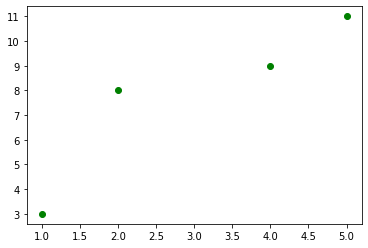

In [ ]:
#Mediante la gráfica
x = np.array([1,2,4,5])
y = np.array([3,8,9,11])
plt.plot(x,y,'go');

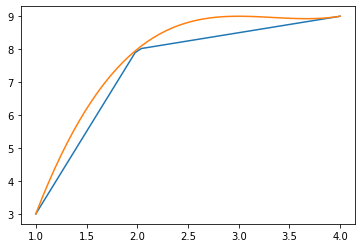

In [ ]:
x_ = np.linspace(1,4)
y_ = np.linspace(3,10)
f = sp.interpolate.interp1d(x,y,'linear')
g = sp.interpolate.interp1d(x,y,'cubic')
plt.plot(x_,f(x_))
plt.plot(x_,g(x_));

#Pseudocodigo para interpolación de lagrange.
1. Defina el conjunto de puntos X,Y.
2. Definir el # de términos n, x = len(x)
3. Calcular $L_{n,i} = \prod \frac{(x-xk)}{(xi-xk)}$ con k=0 y k dif de 1.
4. Calcular $P(x) = ∑  y_i L_{n,i} $

#__Activity__:  Movement with uniform acceleration
1. Define a polynomial for the movement with uniform acceleration:
\begin{align}
x(t)=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2 \,,
\end{align}
2. Use the previous formula expressed as polynomial of degree 2, to solve the following problem with `np.poly1d`: 
    * A car departs from rest with a constant acceleration of $6\text{m}\cdot\text{s}^{-2}$ and travels through a flat and straight road. 10 seconds later a second pass for the same starting point and in the same direction with an initial speed of $10\text{m}\cdot\text{s}^{-1}$ and a constant acelleration of $10\text{m}\cdot\text{s}^{-2}$. Find the time and distance at which the two cars meet. *
    
_Hint_. 
\begin{align}
x(t)=x_0-v_0t_0+\frac{1}{2}at_0^2 +(v_0-at_0)t+\tfrac{1}{2} a t^2 
\end{align}



In [ ]:
import numpy as np
import sympy as sp
from scipy import optimize

In [ ]:
#Primero vamos a definir la función que expresa el movimiento
def mua(x0,v0,t0,t,a):
  return x0 - v0*t0 + (1/2)*a*(t0**2) + (v0 - a*t0)*t +(1/2)*(a)*(t**2)
#Para el primer carro tenemos las condiciones iniciales:
x01 = 0
v01 = 0
t01 = 0
a01 = 6
#Para el segundo carro tenemos las condiciones iniciales:
x02 = 0
v02 = 10
t02 = 10
a02 = 10
#Representemos las ecuaciones para cada carro con poly1d
mua1 = np.poly1d([(1/2)*a01, (v01-a01*t01), x01 - v01*t01 + (1/2)*a01*t01**2], False, variable='t')
mua2 = np.poly1d([(1/2)*a02, (v02-a02*t02), x02 - v02*t02 + (1/2)*a02*t02**2], False, variable='t')
ecuacion = mua2 - mua1
print(f'La expresión para el punto donde se encuentran: {ecuacion}')

La expresión para el punto donde se encuentran:    2
2 x - 90 x + 400


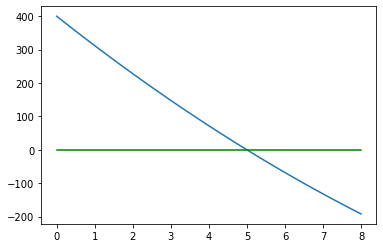

In [ ]:
#Ahora vamos a hallar en qué punto se hace cero la ecuación.
x = np.linspace(0,8,100)
y = ecuacion(x)
lineaCeros = np.zeros(100)
plt.figure()
plt.plot(x,y)
plt.plot(x,lineaCeros,'g');

In [ ]:
#Ahora usemos el método de la bisección para hallar la raíz.
tiempo = optimize.bisect(ecuacion,4.5,6.0)
print(f'El tiempo en el que se encuentran es {tiempo} s.')
#Y veamos el punto donde se encuentran
encuentro = mua2(tiempo)
print(f'Se encuentran en x = {encuentro} m.')

El tiempo en el que se encuentran es 4.999999999999545 s.
Se encuentran en x = 75.00000000001819 m.


#__Activity__: 
For  the function $f(x) = \tan (x)$ between $-\frac{\pi}{4}$ and $\frac{\pi}{4}$ using $N=10$ points (9 intervals). Plot both, the interpolation and the original function.

Explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.




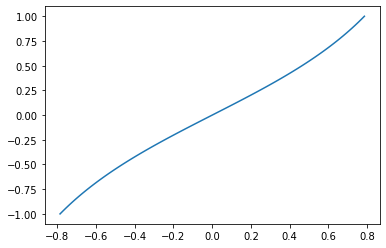

In [ ]:
#Grafiquemos la función tangente
x = np.linspace(-np.pi/4,np.pi/4,100)
plt.plot(x,np.tan(x));

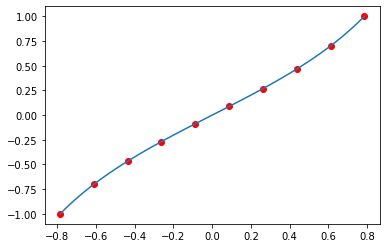

In [ ]:
from scipy import interpolate
#Primero tomemos los puntos en el intervalo
x = np.linspace(-np.pi/4,np.pi/4,10)
y = np.tan(x)
#Grafiquemos los puntos
plt.plot(x,y,'ro');
#Interpolemos los puntos y grafiquemos
funcionLagrange = lagrange(x,y)
x1 = np.linspace(-np.pi/4,np.pi/4,50)
plt.plot(x1,funcionLagrange(x1))

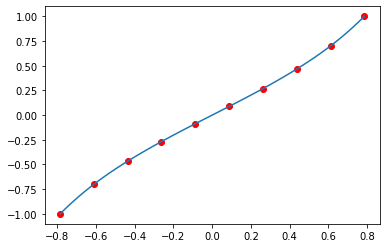

In [ ]:
#Si usamos el método de spline cubic obtenemos la siguiente gráfica.
splinecub = CubicSpline(x,y)
plt.plot(x,y,'ro')
plt.plot(x1,splinecub(x1));

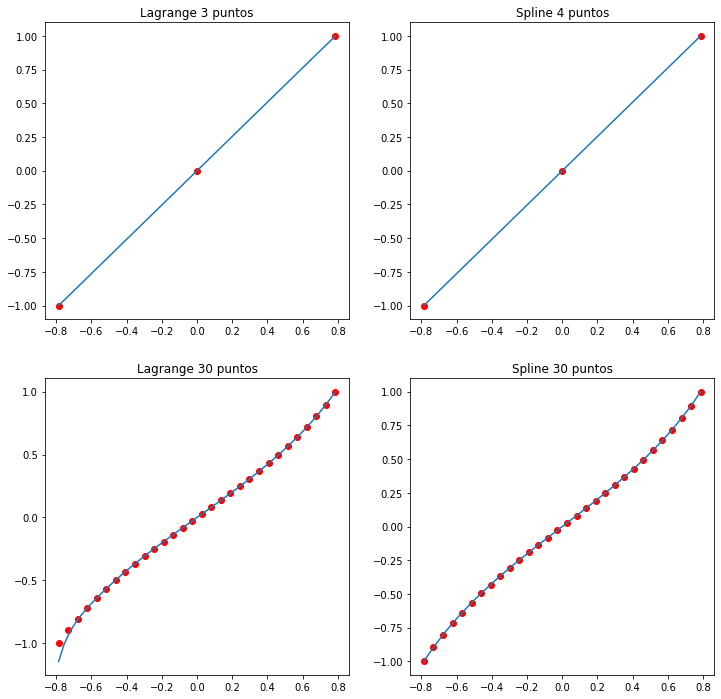

In [ ]:
#Variemos la cantidad de datos para ver si varían las gráficas
#Veamos para 3 y 30 puntos.
x3 = np.linspace(-np.pi/4, np.pi/4, 3)
y3 = np.tan(x3)
x30 = np.linspace(-np.pi/4, np.pi/4, 30)
y30 = np.tan(x30)

#Hallemos las interpolaciones para lagrange
lagrange3 = lagrange(x3,y3)
lagrange30 = lagrange(x30,y30)
#y para cubic splines
cubic3 = CubicSpline(x3,y3)
cubic30 = CubicSpline(x30,y30)
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12,12)

axs[0,0].plot(x3,y3,'ro')
axs[0,0].plot(x1,lagrange3(x1))
axs[0,0].set_title('Lagrange 3 puntos')

axs[0,1].plot(x3,y3,'ro')
axs[0,1].plot(x1,cubic3(x1))
axs[0,1].set_title('Spline 4 puntos')


axs[1,0].plot(x30,y30,'ro')
axs[1,0].plot(x1,lagrange30(x1))
axs[1,0].set_title('Lagrange 30 puntos')

axs[1,1].plot(x30,y30,'ro')
axs[1,1].plot(x1,cubic30(x1))
axs[1,1].set_title('Spline 30 puntos');



Para 3 puntos se observa que la aproximación no es tan acertada ya que se asemeja a una línea recta, mientras que para una mayor cantidad de puntos se refina más

#__Activity__: 
Apply lagrange interpolations with the following points, work with pandas data frame


x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [ ]:
import numpy as np
import pandas as pd
x = np.array([1,1.3,1.6,1.9,2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
df = pd.DataFrame()
df['X'] = x
df['Y'] = fx
df

,X,Y
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [ ]:
from scipy.interpolate import lagrange
poly = lagrange(df['X'],df['Y'])
print(poly)

          4           3         2
0.001825 x + 0.05529 x - 0.343 x + 0.07339 x + 0.9777


#__Activity__:
 Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.


![img](https://github.com/hernansalinas/autogrades/blob/main/Actividades_clase/imagenes/planetario.png?raw=true)

 









1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

In [ ]:
#Carguemos la imagen desde el url
import requests
from PIL import Image
from io import BytesIO
url = 'https://www.turismodeestrellas.com/media/files/1973_planetario-medellin.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

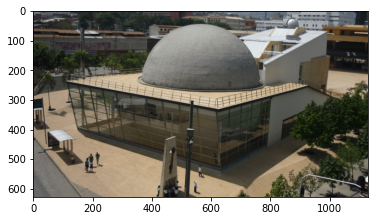

In [ ]:
#Carguemos la imagen con matplotlib
import matplotlib.pyplot as plt
imagen = np.array(img) #Convertimos la imagen a un array
plt.imshow(imagen);

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

In [ ]:
#Tomemos manualmente los puntos desde Glimp
x = np.array([172,176,184,204,235,272,301,323,336])*2.2
y = np.array([104,86,65,43,27,28,41,60,86])*2.2

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

In [ ]:
domo = lagrange(x,y)
y1 = domo(x)
print(domo)

           8             7             6             5            4
2.306e-16 x - 1.043e-12 x + 2.053e-09 x - 2.297e-06 x + 0.001598 x
           3         2
 - 0.7076 x + 194.8 x - 3.047e+04 x + 2.075e+06


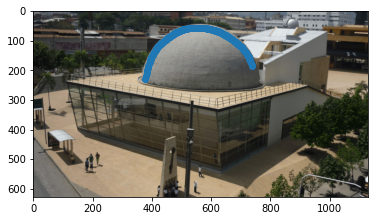

In [ ]:
#Superponemos la función en la imagen
fig, ax = plt.subplots()
ax.imshow(img)
x1 = np.arange(172*2.2,336*2.2,2)
y1 = domo(x1)
ax.scatter(x1,y1);

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


In [ ]:
from scipy.interpolate import CubicSpline
splinecubico = CubicSpline(x,y,bc_type = 'natural')

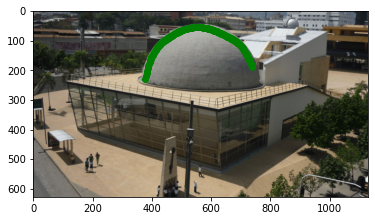

In [ ]:
#Superponemos la función en la imagen
fig, ax = plt.subplots()
ax.imshow(img)
x1 = np.arange(172*2.2,336*2.2,2)
cs = splinecubico(x1)
ax.scatter(x1,cs,color='green');


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ambas interpolaciones presentan oscilaciones debido a que, al ser una aproximación a una curva, se presenta siempre un epsilon asociado al error entre la curva real y la propuesta por el algoritmo, por razones como la espaciación de los puntos, por ejemplo. Para estos casos, la interpolación mediante cubic spline tiende a ser más suave debido a la asociación que se hace con la derivada de la función.